### Actividad 7 - Punto 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

#### Importacion del Dataset

In [3]:
# importar el archivo .csv
data = pd.read_csv('penguins_size.csv')
data = data.dropna()

In [4]:
# obtenemos las etiquetas del dataset
etiquetas = data.iloc[:, 0]

In [5]:
# obtenemos las caracteristicas
caracteristicas = data[['culmen_length_mm','culmen_depth_mm']]

In [10]:
# preprocesado de los datos para re escalar los datos
scaler = StandardScaler()
# normalizacion de los datos de las caracteristicas
caracteristicas_norm = scaler.fit_transform(caracteristicas)

#### Visualizacion de los datos

In [7]:
# diccionario de color 
colors = {'Adelie':'red', 'Chinstrap':'green', 'Gentoo':'blue'}

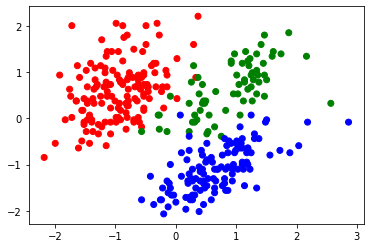

In [12]:
# visualizacion de los datos
plt.scatter(caracteristicas_norm[:,0], caracteristicas_norm[:,1], c=etiquetas.map(colors))

#### Creacion del modelo SVM con Kernel

In [13]:
# separacion de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(caracteristicas_norm, etiquetas, test_size=0.2)

In [14]:
# evaluacion del modelo
def EvaluacionModelo(y_test, y_pred):
    pre_s = metrics.precision_score(y_test, y_pred, average='micro')
    rec_s = metrics.recall_score(y_test, y_pred, average='micro')
    f1_s = metrics.f1_score(y_test, y_pred, average='micro')
    accu_s = metrics.accuracy_score(y_test, y_pred)
    return (pre_s, rec_s, f1_s, accu_s)

In [17]:
# creacion y entrenamiento del modelo
def SVM_Kernel(kernel_name, X_train, y_train, y_test):
    print(f"=== Modelo SVM con Kernel: {kernel_name} ===")
    # Modelo SVM con kernel
    classifier = SVC(kernel =kernel_name, random_state = 0)
     # training set in x, y axis
    classifier.fit(X_train, y_train)
    # prediccion
    y_predict = classifier.predict(X_test)
    
    # matriz de confusion
    cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
    print(f"Matriz de Confusion: \n{cnf_matrix}")
    precision, recall, f1, accuracy = EvaluacionModelo(y_test, y_predict)
    print(f"Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}\n\n")
        

#### Ejecucion y Evaluacion de los Modelos

In [16]:
# ejecuta diferentes kernel y los evalua
for i in ["rbf", "poly", "sigmoid","linear"]:
    SVM_Kernel(i, X_train, y_train, y_test)

=== Modelo SVM con Kernel: rbf ===
Matriz de Confusion: 
[[32  2  0]
 [ 1 12  1]
 [ 0  0 19]]
Precision: 0.9402985074626866, Recall: 0.9402985074626866, F1: 0.9402985074626865, Accuracy: 0.9402985074626866


=== Modelo SVM con Kernel: poly ===
Matriz de Confusion: 
[[34  0  0]
 [ 7  6  1]
 [ 1  0 18]]
Precision: 0.8656716417910447, Recall: 0.8656716417910447, F1: 0.8656716417910447, Accuracy: 0.8656716417910447


=== Modelo SVM con Kernel: sigmoid ===
Matriz de Confusion: 
[[33  1  0]
 [ 1 11  2]
 [ 0  0 19]]
Precision: 0.9402985074626866, Recall: 0.9402985074626866, F1: 0.9402985074626865, Accuracy: 0.9402985074626866


=== Modelo SVM con Kernel: linear ===
Matriz de Confusion: 
[[32  2  0]
 [ 1 11  2]
 [ 0  0 19]]
Precision: 0.9253731343283582, Recall: 0.9253731343283582, F1: 0.9253731343283582, Accuracy: 0.9253731343283582




### Conclusion  

Los Kernel RBF y Sigmoid fueron los que obtuvieron mejores resultados, alrededor del 92% de precisión. Si bien el Kernel Polinomial obtuvo muy buenos resultados de 86% de precisión, se puede observar que es el que mejor pudo hacer una predicción de la especie Adelie, pero obtuvo pésimos resultados para la predicción de la especie Chinstrap.